# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "citiesoutput.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

['emerald', 'busselton', 'tiarei', 'taolanaro', 'thompson', 'bokoro', 'saint-philippe', 'balsas', 'lebu', 'dunedin', 'yellowknife', 'jamestown', 'masallatah', 'bad hersfeld', 'rikitea', 'georgetown', 'tyup', 'fairbanks', 'airai', 'methoni', 'hilo', 'lagoa', 'san cristobal', 'yanchukan', 'guerrero negro', 'yining', 'muros', 'fortuna', 'jimenez', 'illoqqortoormiut', 'saldanha', 'sao filipe', 'sitka', 'khatanga', 'rincon', 'esperance', 'ushuaia', 'hermanus', 'mariinsk', 'cape town', 'ketchikan', 'east london', 'praia', 'tiksi', 'san patricio', 'punta arenas', 'sur', 'lompoc', 'belushya guba', 'jiuquan', 'butaritari', 'sataua', 'swellendam', 'qaanaaq', 'port elizabeth', 'asau', 'kabompo', 'tasiilaq', 'khandyga', 'sao joao da barra', 'vidim', 'forio', 'mar del plata', 'vaini', 'port hedland', 'san quintin', 'cidreira', 'pangkalanbuun', 'fort nelson', 'jibuti', 'aguas belas', 'katsuura', 'bam', 'sawakin', 'adrar', 'hilton head island', 'nikolskoye', 'vaitupu', 'attawapiskat', 'burica', 'chap

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_response= []
    
for city in cities:
    print("Processing request for city # " + str(cities.index(city)) + " " + city)
    
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&units=Imperial&q=" + city

    #get data & jsonify
    weather_response.append(requests.get(query_url).json())


Processing request for city # 0 emerald
Processing request for city # 1 busselton
Processing request for city # 2 tiarei
Processing request for city # 3 taolanaro
Processing request for city # 4 thompson
Processing request for city # 5 bokoro
Processing request for city # 6 saint-philippe
Processing request for city # 7 balsas
Processing request for city # 8 lebu
Processing request for city # 9 dunedin
Processing request for city # 10 yellowknife
Processing request for city # 11 jamestown
Processing request for city # 12 masallatah
Processing request for city # 13 bad hersfeld
Processing request for city # 14 rikitea
Processing request for city # 15 georgetown
Processing request for city # 16 tyup
Processing request for city # 17 fairbanks
Processing request for city # 18 airai
Processing request for city # 19 methoni
Processing request for city # 20 hilo
Processing request for city # 21 lagoa
Processing request for city # 22 san cristobal
Processing request for city # 23 yanchukan
Pro

Processing request for city # 191 bengkulu
Processing request for city # 192 pemba
Processing request for city # 193 mahanoro
Processing request for city # 194 jhajjar
Processing request for city # 195 krasnyy yar
Processing request for city # 196 northam
Processing request for city # 197 basco
Processing request for city # 198 ilirska bistrica
Processing request for city # 199 buin
Processing request for city # 200 chuy
Processing request for city # 201 payo
Processing request for city # 202 mys shmidta
Processing request for city # 203 chagda
Processing request for city # 204 isangel
Processing request for city # 205 port lincoln
Processing request for city # 206 hofn
Processing request for city # 207 mezhdurechensk
Processing request for city # 208 amalapuram
Processing request for city # 209 korla
Processing request for city # 210 mosquera
Processing request for city # 211 kieta
Processing request for city # 212 souillac
Processing request for city # 213 castro
Processing request f

Processing request for city # 380 palestine
Processing request for city # 381 sakaiminato
Processing request for city # 382 huarmey
Processing request for city # 383 lolua
Processing request for city # 384 tolaga bay
Processing request for city # 385 ypsonas
Processing request for city # 386 ulaangom
Processing request for city # 387 vytegra
Processing request for city # 388 wenatchee
Processing request for city # 389 coron
Processing request for city # 390 kaitangata
Processing request for city # 391 klaksvik
Processing request for city # 392 bourail
Processing request for city # 393 makat
Processing request for city # 394 caconda
Processing request for city # 395 kasra
Processing request for city # 396 kavaratti
Processing request for city # 397 khasan
Processing request for city # 398 ponta delgada
Processing request for city # 399 katha
Processing request for city # 400 esna
Processing request for city # 401 sinnamary
Processing request for city # 402 chara
Processing request for c

Processing request for city # 572 asyut
Processing request for city # 573 muzhi
Processing request for city # 574 luderitz
Processing request for city # 575 tomatlan
Processing request for city # 576 olinda
Processing request for city # 577 miquelon
Processing request for city # 578 santa isabel
Processing request for city # 579 torbat-e jam
Processing request for city # 580 kidal
Processing request for city # 581 brandon
Processing request for city # 582 cahors
Processing request for city # 583 ati
Processing request for city # 584 baruun-urt
Processing request for city # 585 along
Processing request for city # 586 bajil
Processing request for city # 587 lichinga
Processing request for city # 588 kalemie
Processing request for city # 589 akyab
Processing request for city # 590 bollnas
Processing request for city # 591 praya
Processing request for city # 592 temaraia
Processing request for city # 593 viedma
Processing request for city # 594 assens
Processing request for city # 595 kimb

In [70]:
pprint(weather_response)

[{'base': 'stations',
  'clouds': {'all': 4},
  'cod': 200,
  'coord': {'lat': -23.5333, 'lon': 148.1667},
  'dt': 1630188472,
  'id': 2167426,
  'main': {'feels_like': 67.8,
           'grnd_level': 997,
           'humidity': 72,
           'pressure': 1017,
           'sea_level': 1017,
           'temp': 67.93,
           'temp_max': 67.93,
           'temp_min': 67.93},
  'name': 'Emerald',
  'sys': {'country': 'AU', 'sunrise': 1630182091, 'sunset': 1630223741},
  'timezone': 36000,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 345, 'gust': 11.61, 'speed': 7.2}},
 {'base': 'stations',
  'clouds': {'all': 48},
  'cod': 200,
  'coord': {'lat': -33.65, 'lon': 115.3333},
  'dt': 1630188472,
  'id': 2075265,
  'main': {'feels_like': 52,
           'grnd_level': 1014,
           'humidity': 84,
           'pressure': 1015,
           'sea_level': 1015,
        

  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 348, 'gust': 5.44, 'speed': 4.83}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 55.3422, 'lon': -131.6461},
  'dt': 1630188481,
  'id': 5554428,
  'main': {'feels_like': 60.48,
           'humidity': 72,
           'pressure': 1013,
           'temp': 61.27,
           'temp_max': 61.27,
           'temp_min': 61.27},
  'name': 'Ketchikan',
  'rain': {'1h': 0.25},
  'sys': {'country': 'US',
          'id': 7741,
          'sunrise': 1630158341,
          'sunset': 1630209008,
          'type': 1},
  'timezone': -28800,
  'visibility': 10000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 0, 'speed': 6.91}},
 {'base': 'stations',
  'clouds': {'all': 51},
  'cod': 200,
  'co

  'cod': 200,
  'coord': {'lat': 49.7834, 'lon': -74.8492},
  'dt': 1630188490,
  'id': 5919850,
  'main': {'feels_like': 56.84,
           'grnd_level': 976,
           'humidity': 57,
           'pressure': 1023,
           'sea_level': 1023,
           'temp': 58.6,
           'temp_max': 58.6,
           'temp_min': 58.6},
  'name': 'Chapais',
  'sys': {'country': 'CA', 'sunrise': 1630145367, 'sunset': 1630194726},
  'timezone': -14400,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 175, 'gust': 11.81, 'speed': 3.85}},
 {'base': 'stations',
  'clouds': {'all': 12},
  'cod': 200,
  'coord': {'lat': -0.6136, 'lon': -47.3561},
  'dt': 1630188491,
  'id': 3389822,
  'main': {'feels_like': 86.09,
           'grnd_level': 1012,
           'humidity': 82,
           'pressure': 1012,
           'sea_level': 1012,
           'temp': 80.69,
           'temp_m

           'temp_min': 54.03},
  'name': 'Necochea',
  'sys': {'country': 'AR',
          'id': 2010353,
          'sunrise': 1630146175,
          'sunset': 1630186185,
          'type': 2},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 338, 'gust': 12.88, 'speed': 7.76}},
 {'base': 'stations',
  'clouds': {'all': 88},
  'cod': 200,
  'coord': {'lat': -4.05, 'lon': 19.5333},
  'dt': 1630188500,
  'id': 2313084,
  'main': {'feels_like': 78.49,
           'grnd_level': 963,
           'humidity': 62,
           'pressure': 1010,
           'sea_level': 1010,
           'temp': 78.08,
           'temp_max': 78.08,
           'temp_min': 78.08},
  'name': 'Mangai',
  'sys': {'country': 'CD', 'sunrise': 1630125762, 'sunset': 1630169036},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
       

  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 263, 'gust': 1.63, 'speed': 1.54}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 57.79, 'lon': -152.4072},
  'dt': 1630188513,
  'id': 5866583,
  'main': {'feels_like': 59.4,
           'humidity': 29,
           'pressure': 1011,
           'temp': 62.11,
           'temp_max': 62.11,
           'temp_min': 62.11},
  'name': 'Saint Paul Harbor',
  'sys': {'country': 'US',
          'id': 7668,
          'sunrise': 1630162968,
          'sunset': 1630214344,
          'type': 1},
  'timezone': -28800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 280, 'gust': 28.77, 'speed': 20.71}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 71.9167, 'lon':

  'timezone': 0,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 245, 'gust': 10.45, 'speed': 9.13}},
 {'base': 'stations',
  'clouds': {'all': 71},
  'cod': 200,
  'coord': {'lat': 53.6942, 'lon': 88.0603},
  'dt': 1630188526,
  'id': 1498920,
  'main': {'feels_like': 53.29,
           'grnd_level': 980,
           'humidity': 93,
           'pressure': 1008,
           'sea_level': 1008,
           'temp': 53.83,
           'temp_max': 53.83,
           'temp_min': 53.83},
  'name': 'Mezhdurechensk',
  'sys': {'country': 'RU', 'sunrise': 1630192271, 'sunset': 1630242405},
  'timezone': 25200,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 127, 'gust': 2.95, 'speed': 3.2}},
 {'base': 'stations',
  'clouds': {'all': 100},
  '

  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 200, 'speed': 3.44}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': -21.3393, 'lon': 55.4781},
  'dt': 1630188539,
  'id': 935214,
  'main': {'feels_like': 69.75,
           'humidity': 90,
           'pressure': 1018,
           'temp': 68.92,
           'temp_max': 69.48,
           'temp_min': 68.29},
  'name': 'Saint-Pierre',
  'rain': {'1h': 0.51},
  'sys': {'country': 'RE',
          'id': 2127,
          'sunrise': 1630204223,
          'sunset': 1630246089,
          'type': 1},
  'timezone': 14400,
  'visibility': 9000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 130, 'speed': 4.61}},
 {'base': 'stations',
  'clouds': {'all': 17},
  'cod': 200,
  'coord': {'lat': 43.1667, 'lon': 70.466

          'sunset': 1630196539,
          'type': 2},
  'timezone': -14400,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 343, 'gust': 4.68, 'speed': 2.35}},
 {'base': 'stations',
  'clouds': {'all': 46},
  'cod': 200,
  'coord': {'lat': 68.2191, 'lon': -135.0107},
  'dt': 1630188551,
  'id': 5882953,
  'main': {'feels_like': 52.48,
           'grnd_level': 1008,
           'humidity': 65,
           'pressure': 1009,
           'sea_level': 1009,
           'temp': 54.3,
           'temp_max': 54.3,
           'temp_min': 54.3},
  'name': 'Aklavik',
  'sys': {'country': 'CA', 'sunrise': 1630156329, 'sunset': 1630212635},
  'timezone': -21600,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 169, 'gust': 3.6, 'speed': 3.24}},
 

  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 200, 'gust': 45.77, 'speed': 28.72}},
 {'base': 'stations',
  'clouds': {'all': 2},
  'cod': 200,
  'coord': {'lat': 48.347, 'lon': 38.0542},
  'dt': 1630188564,
  'id': 707753,
  'main': {'feels_like': 71.92,
           'grnd_level': 981,
           'humidity': 49,
           'pressure': 1014,
           'sea_level': 1014,
           'temp': 72.66,
           'temp_max': 72.66,
           'temp_min': 72.66},
  'name': 'Horlivka',
  'sys': {'country': 'UA', 'sunrise': 1630204875, 'sunset': 1630253800},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 31, 'gust': 7.07, 'speed': 4.94}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
 

  'dt': 1630188576,
  'id': 1716834,
  'main': {'feels_like': 79.12,
           'grnd_level': 1004,
           'humidity': 83,
           'pressure': 1008,
           'sea_level': 1008,
           'temp': 79.12,
           'temp_max': 79.12,
           'temp_min': 79.12},
  'name': 'Coron',
  'sys': {'country': 'PH', 'sunrise': 1630187334, 'sunset': 1630231916},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 89, 'gust': 10.85, 'speed': 7.14}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -46.2817, 'lon': 169.8464},
  'dt': 1630188576,
  'id': 2208248,
  'main': {'feels_like': 43.39,
           'grnd_level': 1011,
           'humidity': 83,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 45.88,
           'temp_max': 45.88,
           'temp_min': 45.88},
  'name': 'Kait

               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 177, 'gust': 16.06, 'speed': 9.73}},
 {'base': 'stations',
  'clouds': {'all': 5},
  'cod': 200,
  'coord': {'lat': -35.5667, 'lon': 138.6167},
  'dt': 1630188587,
  'id': 2059470,
  'main': {'feels_like': 43.03,
           'humidity': 91,
           'pressure': 1010,
           'temp': 46.45,
           'temp_max': 51.89,
           'temp_min': 46},
  'name': 'Victor Harbor',
  'sys': {'country': 'AU',
          'id': 2020876,
          'sunrise': 1630184993,
          'sunset': 1630225421,
          'type': 2},
  'timezone': 34200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 286, 'gust': 9.4, 'speed': 6.76}},
 {'base': 'stations',
  'clouds': {'all': 32},
  'cod': 200,
  'coord': {'lat': -23.8597, 'lon': 35.3472},
  'dt': 1630188588,
  'id': 1039536

  'sys': {'country': 'PE',
          'id': 8682,
          'sunrise': 1630149257,
          'sunset': 1630191881,
          'type': 1},
  'timezone': -18000,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 180, 'speed': 10.36}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 22.7886, 'lon': 100.9748},
  'dt': 1630188597,
  'id': 1794209,
  'main': {'feels_like': 62.89,
           'grnd_level': 866,
           'humidity': 96,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 62.44,
           'temp_max': 62.44,
           'temp_min': 62.44},
  'name': 'Simao',
  'sys': {'country': 'CN', 'sunrise': 1630191464, 'sunset': 1630237015},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               '

          'sunrise': 1630157037,
          'sunset': 1630205824,
          'type': 2},
  'timezone': -25200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 224, 'gust': 3, 'speed': 1.01}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 55.1001, 'lon': -105.2842},
  'dt': 1630188611,
  'id': 6050066,
  'main': {'feels_like': 59.36,
           'grnd_level': 970,
           'humidity': 79,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 59.95,
           'temp_max': 59.95,
           'temp_min': 59.95},
  'name': 'La Ronge',
  'sys': {'country': 'CA', 'sunrise': 1630152040, 'sunset': 1630202659},
  'timezone': -21600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 344, 

  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 92, 'gust': 2.82, 'speed': 1.61}},
 {'base': 'stations',
  'clouds': {'all': 98},
  'cod': 200,
  'coord': {'lat': -9.0996, 'lon': 160.1476},
  'dt': 1630188622,
  'id': 2102384,
  'main': {'feels_like': 87.49,
           'grnd_level': 1007,
           'humidity': 75,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 81.97,
           'temp_max': 81.97,
           'temp_min': 81.97},
  'name': 'Tulagi',
  'sys': {'country': 'SB', 'sunrise': 1630178603, 'sunset': 1630221479},
  'timezone': 39600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 118, 'gust': 26.46, 'speed': 24.58}},
 {'base': 'stations',
  'clouds': {'all': 51},
  'cod': 200,
  'coord': {'lat': 13.3154, 'lon': 12.

  'coord': {'lat': 34.4506, 'lon': 40.9171},
  'dt': 1630188634,
  'id': 174448,
  'main': {'feels_like': 88.99,
           'grnd_level': 982,
           'humidity': 14,
           'pressure': 1002,
           'sea_level': 1002,
           'temp': 93.4,
           'temp_max': 93.4,
           'temp_min': 93.4},
  'name': 'Abu Kamal',
  'sys': {'country': 'SY', 'sunrise': 1630205251, 'sunset': 1630252049},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 303, 'gust': 10.58, 'speed': 9.62}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -8.145, 'lon': 159.5921},
  'dt': 1630188634,
  'id': 2109528,
  'main': {'feels_like': 88.34,
           'grnd_level': 1009,
           'humidity': 77,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 82.13,
           'temp_max': 82.13,
          

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
#import into DF
weather_response_df = pd.json_normalize(weather_response)

#drop rows not relevant
weather_response_df = weather_response_df[['name', 'sys.country','coord.lon','coord.lat','main.temp_max','main.humidity', 'clouds.all', 'wind.speed', 'dt']]

#rename columns
weather_response_df = weather_response_df.rename(columns={'name': 'Name', 'sys.country': 'Country','coord.lon':'Longitude','coord.lat':'Latitude','main.temp_max':'Max Temp','main.humidity':'Humidity', 'clouds.all':'Cloudiness', 'wind.speed':'Wind Speed', 'dt': 'Date'})

#drop cities not found
weather_response_df.dropna(inplace = True)

#export to csv
weather_response_df.to_csv(output_data_file)

#display
weather_response_df

,Name,Country,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Emerald,AU,148.1667,-23.5333,67.93,72.0,4.0,7.20,1.630188e+09
1,Busselton,AU,115.3333,-33.6500,54.09,84.0,48.0,13.00,1.630188e+09
2,Tiarei,PF,-149.3333,-17.5333,80.62,81.0,24.0,11.59,1.630188e+09
4,Thompson,CA,-97.8558,55.7435,69.73,46.0,100.0,5.88,1.630188e+09
5,Bokoro,TD,17.0568,12.3807,81.81,68.0,41.0,7.52,1.630188e+09
...,...,...,...,...,...,...,...,...,...
608,Baracoa,CU,-74.4958,20.3467,83.62,75.0,95.0,5.48,1.630189e+09
609,Whitehorse,CA,-135.0538,60.7161,50.02,94.0,100.0,2.13,1.630189e+09
610,Platteville,US,-90.4785,42.7342,93.47,62.0,40.0,12.66,1.630189e+09
611,Nizhniy Kuranakh,RU,125.4869,58.8353,40.87,77.0,3.0,1.32,1.630189e+09


In [75]:
weather_response_df.describe()

,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,17.455337,18.575042,68.449929,71.648841,55.914439,7.105080,1.630189e+09
std,88.686757,33.088404,15.600071,21.618602,39.174607,4.986373,7.574171e+01
min,-175.200000,-54.800000,32.020000,8.000000,0.000000,0.000000,1.630188e+09
25%,-59.950000,-8.190000,55.110000,64.000000,13.000000,3.400000,1.630189e+09
50%,21.688600,20.716700,71.510000,77.000000,65.000000,5.880000,1.630189e+09
75%,88.397200,46.433300,78.890000,87.000000,97.000000,9.730000,1.630189e+09
max,179.316700,78.218600,109.290000,100.000000,100.000000,28.720000,1.630189e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [76]:
humidityfilter = weather_response_df.loc[(weather_response_df['Humidity'] > 100)]
humidityfilter

,Name,Country,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date


In [77]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_df = weather_response_df.drop(humidityfilter.index)
clean_city_df

,Name,Country,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Emerald,AU,148.1667,-23.5333,67.93,72.0,4.0,7.20,1.630188e+09
1,Busselton,AU,115.3333,-33.6500,54.09,84.0,48.0,13.00,1.630188e+09
2,Tiarei,PF,-149.3333,-17.5333,80.62,81.0,24.0,11.59,1.630188e+09
4,Thompson,CA,-97.8558,55.7435,69.73,46.0,100.0,5.88,1.630188e+09
5,Bokoro,TD,17.0568,12.3807,81.81,68.0,41.0,7.52,1.630188e+09
...,...,...,...,...,...,...,...,...,...
608,Baracoa,CU,-74.4958,20.3467,83.62,75.0,95.0,5.48,1.630189e+09
609,Whitehorse,CA,-135.0538,60.7161,50.02,94.0,100.0,2.13,1.630189e+09
610,Platteville,US,-90.4785,42.7342,93.47,62.0,40.0,12.66,1.630189e+09
611,Nizhniy Kuranakh,RU,125.4869,58.8353,40.87,77.0,3.0,1.32,1.630189e+09


In [89]:
clean_city_df.dtypes

Name           object
Country        object
Longitude     float64
Latitude      float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Date          float64
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

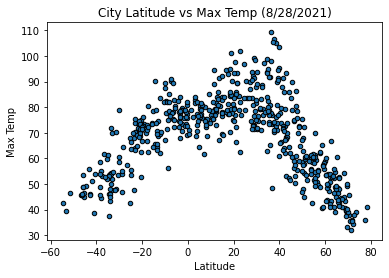

In [83]:
clean_city_df.plot(kind='scatter', x= 'Latitude', y= 'Max Temp', title= "City Latitude vs Max Temp (8/28/2021)",facecolors='blue',edgecolors='black')

print("there does appear to be a relationship between latitude and temp, but the highest temps on this date are actually a bit above the equator")

## Latitude vs. Humidity Plot

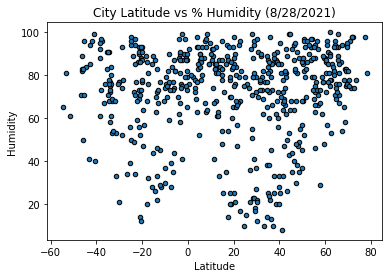

In [84]:
clean_city_df.plot(kind='scatter', x= 'Latitude', y= 'Humidity', title= "City Latitude vs % Humidity (8/28/2021)",facecolors='blue',edgecolors='black')

print("there does not seem to be a relationship between latitude and humidity")

## Latitude vs. Cloudiness Plot

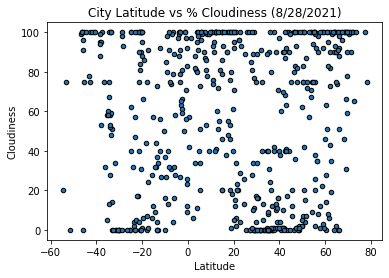

In [85]:
clean_city_df.plot(kind='scatter', x= 'Latitude', y= 'Cloudiness', title= "City Latitude vs % Cloudiness (8/28/2021)",facecolors='blue',edgecolors='black')

print("there does not seem to be a relationship between latitude and cloudiness")

## Latitude vs. Wind Speed Plot

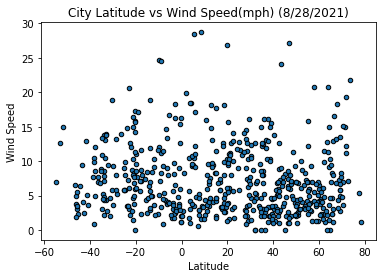

In [86]:
clean_city_df.plot(kind='scatter', x= 'Latitude', y= 'Wind Speed', title= "City Latitude vs Wind Speed(mph) (8/28/2021)",facecolors='blue',edgecolors='black')

print("there does not seem to be a relationship between latitude and wind speed")

## Linear Regression

In [95]:
#create separate dfs for each hemisphere
clean_city_df_NH = clean_city_df.loc[(clean_city_df['Latitude'] >=0)]
clean_city_df_SH = clean_city_df.loc[(clean_city_df['Latitude'] <=0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.7291467792163255


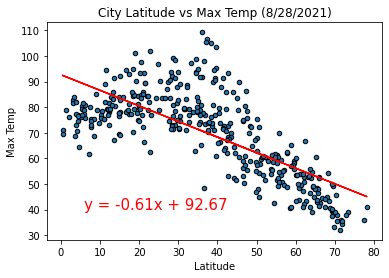

In [109]:

clean_city_df_NH.plot(kind='scatter', x= 'Latitude', y= 'Max Temp', title= "City Latitude vs Max Temp (8/28/2021)",facecolors='blue',edgecolors='black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_df_NH['Latitude'],clean_city_df_NH['Max Temp'])
regress_values = clean_city_df_NH['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(clean_city_df_NH['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(6,40),fontsize=15,color="red")

print("The r-value is " + str(rvalue))
print("The R-value confirms a pretty strong relationship between latitude and temperature")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.8273896280868733


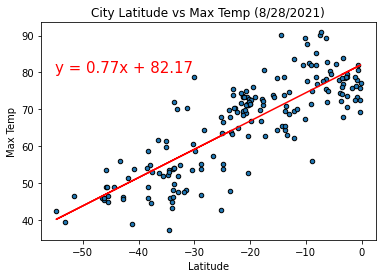

In [117]:

clean_city_df_SH.plot(kind='scatter', x= 'Latitude', y= 'Max Temp', title= "City Latitude vs Max Temp (8/28/2021)",facecolors='blue',edgecolors='black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_df_SH['Latitude'],clean_city_df_SH['Max Temp'])
regress_values = clean_city_df_SH['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(clean_city_df_SH['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

print("The r-value is " + str(rvalue))
print("The R-value confirms a strong relationship between latitude and temperature. The relationship is stronger and more direct than in the northern hemisphere")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.09918703680249655


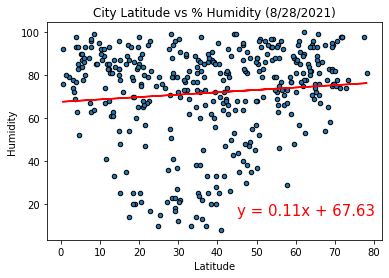

In [115]:
clean_city_df_NH.plot(kind='scatter', x= 'Latitude', y= 'Humidity', title= "City Latitude vs % Humidity (8/28/2021)",facecolors='blue',edgecolors='black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_df_NH['Latitude'],clean_city_df_NH['Humidity'])
regress_values = clean_city_df_NH['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(clean_city_df_NH['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

print("The r-value is " + str(rvalue))
print("The R-value confirms little to no relationship between latitude and huimidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.060572630856400224


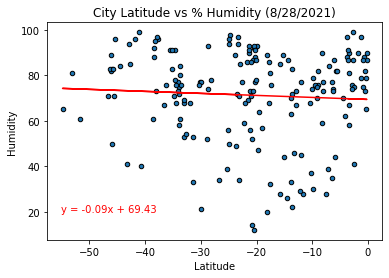

In [121]:
clean_city_df_SH.plot(kind='scatter', x= 'Latitude', y= 'Humidity', title= "City Latitude vs % Humidity (8/28/2021)",facecolors='blue',edgecolors='black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_df_SH['Latitude'],clean_city_df_SH['Humidity'])
regress_values = clean_city_df_SH['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(clean_city_df_SH['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=10,color="red")

print("The r-value is " + str(rvalue))
print("The R-value confirms little to no relationship between latitude and humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.019079731103811167


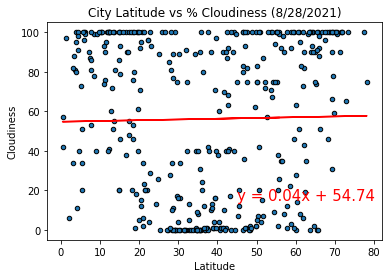

In [122]:
clean_city_df_NH.plot(kind='scatter', x= 'Latitude', y= 'Cloudiness', title= "City Latitude vs % Cloudiness (8/28/2021)",facecolors='blue',edgecolors='black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_df_NH['Latitude'],clean_city_df_NH['Cloudiness'])
regress_values = clean_city_df_NH['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(clean_city_df_NH['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

print("The r-value is " + str(rvalue))
print("The R-value confirms little to no relationship between latitude and cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.060089502975483794


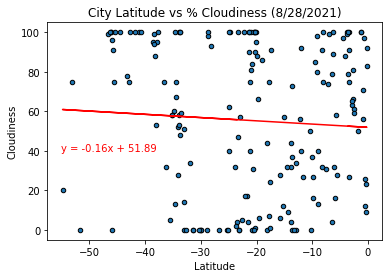

In [123]:
clean_city_df_SH.plot(kind='scatter', x= 'Latitude', y= 'Cloudiness', title= "City Latitude vs % Cloudiness (8/28/2021)",facecolors='blue',edgecolors='black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_df_SH['Latitude'],clean_city_df_SH['Cloudiness'])
regress_values = clean_city_df_SH['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(clean_city_df_SH['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=10,color="red")

print("The r-value is " + str(rvalue))
print("The R-value confirms little to no relationship between latitude and cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.09346189740085546


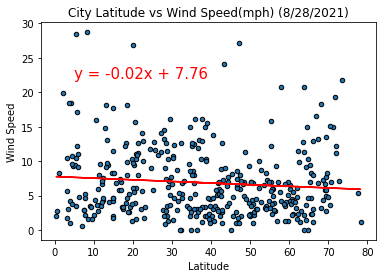

In [125]:
clean_city_df_NH.plot(kind='scatter', x= 'Latitude', y= 'Wind Speed', title= "City Latitude vs Wind Speed(mph) (8/28/2021)",facecolors='blue',edgecolors='black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_df_NH['Latitude'],clean_city_df_NH['Wind Speed'])
regress_values = clean_city_df_NH['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(clean_city_df_NH['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(5, 22),fontsize=15,color="red")

print("The r-value is " + str(rvalue))
print("The R-value confirms little to no relationship between latitude and wind speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0017487427404109402


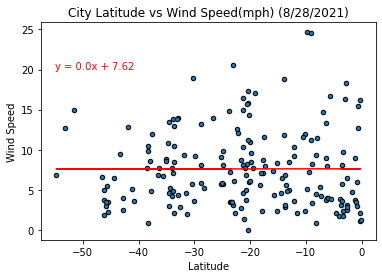

In [127]:
clean_city_df_SH.plot(kind='scatter', x= 'Latitude', y= 'Wind Speed', title= "City Latitude vs Wind Speed(mph) (8/28/2021)",facecolors='blue',edgecolors='black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_df_SH['Latitude'],clean_city_df_SH['Wind Speed'])
regress_values = clean_city_df_SH['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(clean_city_df_SH['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=10,color="red")

print("The r-value is " + str(rvalue))
print("The R-value confirms no relationship between latitude and wind speed")